In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [2]:
# Performing hierarchical clustering

In [3]:
air = pd.read_csv("G:\data sceince\Assignments\Clustering/EastWestAirlines.csv")

In [4]:
air.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [5]:
# Determining the number of rows and columns

In [6]:
air.shape

(3999, 12)

In [7]:
# performing business decisions

In [8]:
air.iloc[:,1:].describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [9]:
# Correlation matrix

In [10]:
air.iloc[:,1:].corr()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance            1.000000    0.108722   0.338344  -0.008804   0.035243   
Qual_miles         0.108722    1.000000   0.007931  -0.013923  -0.007779   
cc1_miles          0.338344    0.007931   1.000000  -0.068223   0.060555   
cc2_miles         -0.008804   -0.013923  -0.068223   1.000000  -0.006166   
cc3_miles          0.035243   -0.007779   0.060555  -0.006166   1.000000   
Bonus_miles        0.403487    0.031021   0.825200  -0.003969   0.204134   
Bonus_trans        0.324935    0.050725   0.608943   0.064399   0.097313   
Flight_miles_12mo  0.217551    0.126774   0.037370   0.010598  -0.001777   
Flight_trans_12    0.255700    0.144004   0.041333   0.028284  -0.001117   
Days_since_enroll  0.263129    0.017312   0.230849  -0.005807   0.010832   
Award?             0.178494    0.095256   0.335457   0.005332   0.023484   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Balance               0.403487     0.324935           0.217551   
Qual_miles            0.031021     0.050725           0.126774   
cc1_miles             0.825200     0.608943           0.037370   
cc2_miles            -0.003969     0.064399           0.010598   
cc3_miles             0.204134     0.097313          -0.001777   
Bonus_miles           1.000000     0.603180           0.183536   
Bonus_trans           0.603180     1.000000           0.377216   
Flight_miles_12mo     0.183536     0.377216           1.000000   
Flight_trans_12       0.185261     0.432364           0.869193   
Days_since_enroll     0.210397     0.161262           0.037271   
Award?                0.373506     0.333893           0.217715   

                   Flight_trans_12  Days_since_enroll    Award?  
Balance                   0.255700           0.263129  0.178494  
Qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284          -0.005807  0.005332  
cc3_miles                -0.001117           0.010832  0.023484  
Bonus_miles               0.185261           0.210397  0.373506  
Bonus_trans               0.432364           0.161262  0.333893  
Flight_miles_12mo         0.869193           0.037271  0.217715  
Flight_trans_12           1.000000           0.059260  0.247909  
Days_since_enroll         0.059260           1.000000  0.188121  
Award?                    0.247909           0.188121  1.000000

In [11]:
# Determining null vales

In [12]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [13]:
# Checking normality of the data

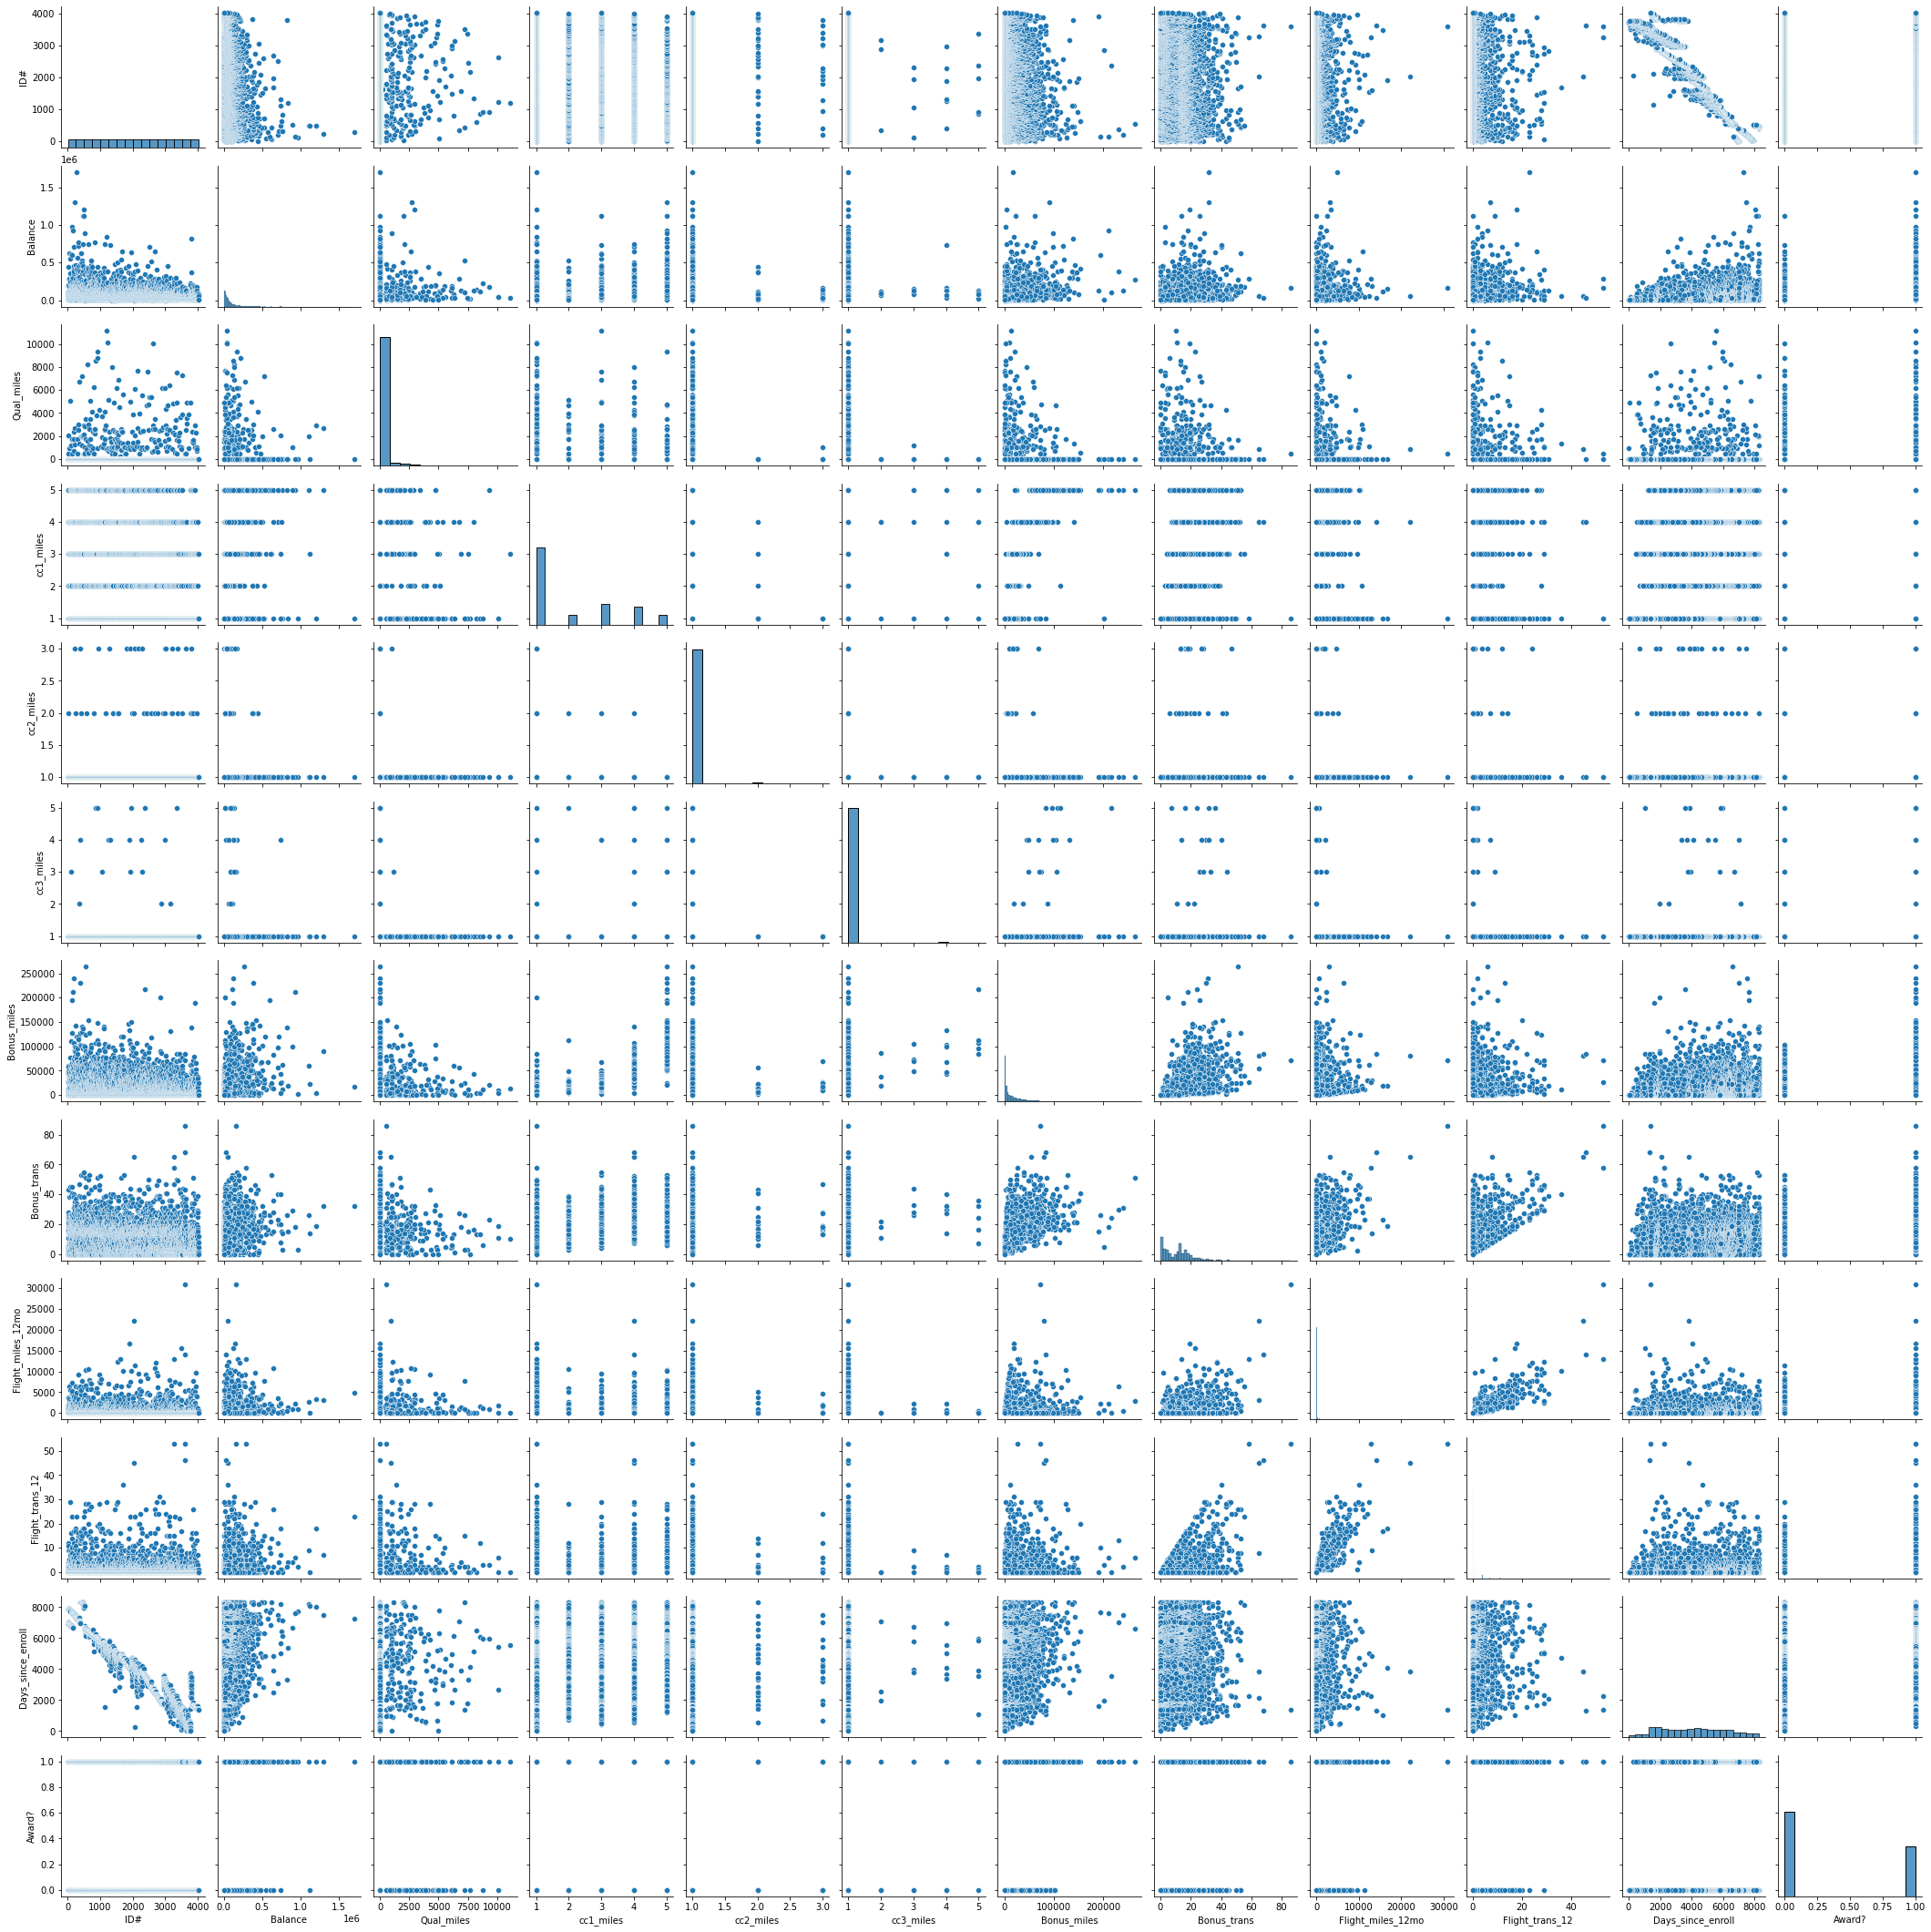

In [14]:
sns.pairplot(air)

In [13]:
array = air.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [14]:
# Standardizing the data using StandardScaler

In [15]:
scaler = StandardScaler().fit(array)
X = scaler.transform(array)

In [16]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [17]:
# Creating Dendrogram

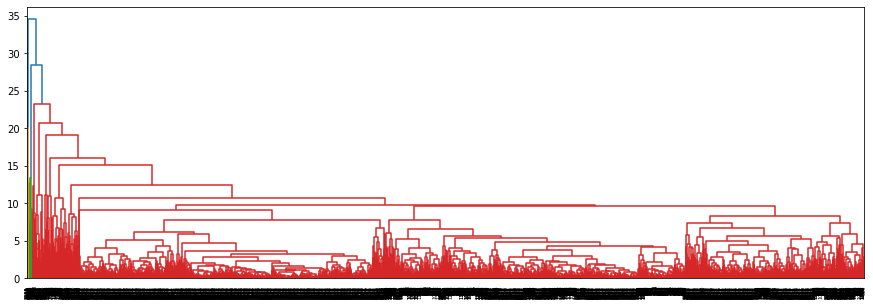

In [18]:
plt.figure(figsize = (15,5))
dendrogram = sch.dendrogram(sch.linkage(X,method = 'complete'))

In [ ]:
# Model building using agglomerative clustering

In [21]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [22]:
y_hc = hc.fit_predict(X)

In [23]:
cluster = pd.DataFrame(y_hc,columns = ['cluster'])

In [24]:
cluster

cluster
0           1
1           1
2           1
3           1
4           1
...       ...
3994        1
3995        1
3996        1
3997        1
3998        1

[3999 rows x 1 columns]

In [25]:
air['clust']=hc.labels_

In [26]:
air

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      1  
1          0      1  
2          0      1  
3          0      1  
4          1      1  
...      ...    ...  
3994       1      1  
3995       1      1  
3996       1      1  
3997       0      1  
3998       0      1  

[3999 rows x 13 columns]

In [51]:
air.iloc[:,1:].groupby(air.clust).mean()

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clust                                                               
0      1.604925e+05  1055.769231   1.769231   1.000000   1.000000   
1      7.027508e+04   140.628447   2.064096   1.000000   1.000766   
2      1.380614e+05    78.800000   3.466667   1.000000   4.066667   
3      1.001290e+06   808.833333   2.416667   1.000000   1.000000   
4      6.887658e+04    23.255814   1.139535   2.348837   1.000000   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clust                                                                  
0      36727.307692    40.923077       14413.615385        31.076923   
1      16777.292901    11.360572         408.641471         1.247702   
2      93927.866667    28.066667         506.666667         1.600000   
3      28693.750000    16.750000        1624.416667         7.000000   
4      14689.837209    17.534884         582.627907         2.209302   

       Days_since_enroll    Award?  clust  
clust                                      
0            3883.538462  1.000000      0  
1            4109.794433  0.365679      1  
2            4613.866667  0.533333      2  
3            7150.500000  0.916667      3  
4            3968.930233  0.395349      4

In [ ]:
# KMeans clustering

In [27]:
data_air = pd.read_csv("G:/data sceince/Assignments/Clustering/EastWestAirlines.csv")

In [28]:
data_air.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [29]:
array1 = data_air.values
array1

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [30]:
scaler = StandardScaler().fit(array1)
X1 = scaler.transform(array1)

set_printoptions(precision = 2)
X1

array([[-1.74e+00, -4.51e-01, -1.86e-01, ..., -3.62e-01,  1.40e+00,
        -7.67e-01],
       [-1.73e+00, -5.39e-01, -1.86e-01, ..., -3.62e-01,  1.38e+00,
        -7.67e-01],
       [-1.73e+00, -3.20e-01, -1.86e-01, ..., -3.62e-01,  1.41e+00,
        -7.67e-01],
       ...,
       [ 1.73e+00, -4.29e-05, -1.86e-01, ..., -3.62e-01, -1.32e+00,
         1.30e+00],
       [ 1.73e+00, -1.86e-01, -1.86e-01, ..., -9.85e-02, -1.32e+00,
        -7.67e-01],
       [ 1.73e+00, -7.01e-01, -1.86e-01, ..., -3.62e-01, -1.32e+00,
        -7.67e-01]])

In [31]:
# creating Elbow curve or scree plot

Text(0, 0.5, 'WCSS')

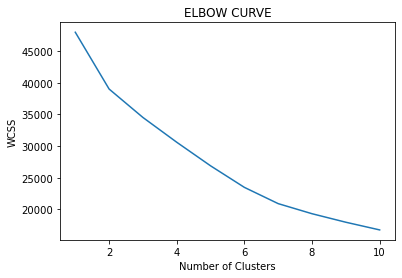

In [32]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("ELBOW CURVE")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [33]:
# Model building

In [115]:
model = KMeans(n_clusters = 6)
model.fit(X1)

KMeans(n_clusters=6)

In [116]:
c_4 = model.labels_
c_4

array([4, 4, 4, ..., 0, 0, 0])

In [117]:
md = pd.Series(model.labels_)
data_air['Clust'] = md

In [118]:
data_air

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Clust  
0          0      4  
1          0      4  
2          0      4  
3          0      4  
4          1      1  
...      ...    ...  
3994       1      0  
3995       1      0  
3996       1      0  
3997       0      0  
3998       0      0  

[3999 rows x 13 columns]

In [119]:
data_air.iloc[:,1:].groupby(data_air.Clust).mean()

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Clust                                                                
0       39725.051265   108.905459   1.376165   1.000000   1.000000   
1      125694.798020   120.522772   3.944554   1.000000   1.001980   
2      138061.400000    78.800000   3.466667   1.000000   4.066667   
3       68876.581395    23.255814   1.139535   2.348837   1.000000   
4       56924.962904    90.146014   1.356748   1.000000   1.000789   
5      188619.716049  1077.858025   2.253086   1.000000   1.000000   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Clust                                                                  
0       6047.687750     7.634487         197.202397         0.587883   
1      44539.620792    19.304950         357.527723         1.078218   
2      93927.866667    28.066667         506.666667         1.600000   
3      14689.837209    17.534884         582.627907         2.209302   
4       5725.348856     7.823204         225.968429         0.694554   
5      32092.580247    26.814815        5330.290123        15.567901   

       Days_since_enroll    Award?  Clust  
Clust                                      
0            2145.462716  0.202397      0  
1            4961.945545  0.698020      1  
2            4613.866667  0.533333      2  
3            3968.930233  0.395349      3  
4            5715.100237  0.247830      4  
5            4661.512346  0.820988      5

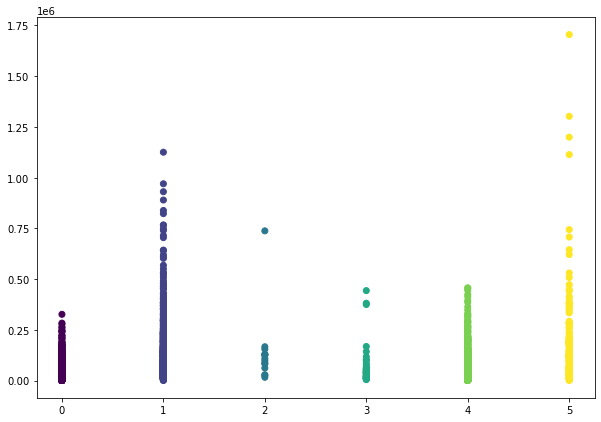

In [120]:
plt.figure(figsize=(10,7))
plt.scatter(data_air['Clust'], data_air['Balance'], c= c_4)

In [39]:
# Performing DBSCAN

In [30]:
db_air = pd.read_csv("G:/data sceince/Assignments/Clustering/EastWestAirlines.csv")

In [32]:
db_air.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [33]:
array2 = db_air.values
array2

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [34]:
scale = StandardScaler().fit(array2)
X2 = scale.transform(array2)

In [35]:
X2

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [22]:
#building model

In [23]:
dbscan = DBSCAN(eps = 1, min_samples = 13)
dbscan.fit(X2)

DBSCAN(eps=1, min_samples=13)

In [24]:
#determining noisy points

In [25]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
db_air['ClustM'] = dbscan.labels_
db_air

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  ClustM  
0          0       0  
1          0       0  
2          0       0  
3          0       0  
4          1      -1  
...      ...     ...  
3994       1       1  
3995       1       1  
3996       1       1  
3997       0       0  
3998       0       0  

[3999 rows x 13 columns]

In [44]:
pd.concat([db_air,cl],axis=1)

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  ClustM  
0          0       0  
1          0       0  
2          0       0  
3          0       0  
4          1      -1  
...      ...     ...  
3994       1       1  
3995       1       1  
3996       1       1  
3997       0       0  
3998       0       0  

[3999 rows x 13 columns]

In [47]:
db_air.groupby('ClustM').agg(['mean']).reset_index()

ClustM          ID#        Balance  Qual_miles cc1_miles cc2_miles  \
                 mean           mean        mean      mean      mean   
0     -1  1795.379442  160751.046954  719.941624  2.638325  1.073604   
1      0  2183.948615   50839.318141    1.502234  1.634495  1.000000   
2      1  1803.522097   55376.659815    5.794450  2.568345  1.000000   

  cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
       mean          mean        mean              mean            mean   
0  1.062183  35822.304569   20.432741       1836.437817        5.294416   
1  1.000000   8603.287757    8.133601         97.187668        0.330206   
2  1.000000  21665.062693   12.427544        180.004111        0.598150   

  Days_since_enroll   Award?  
               mean     mean  
0       4560.195431  0.64467  
1       3797.048257  0.00000  
2       4500.401850  1.00000